# Exploratory Data analysis on Haberman Dataset

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
haberman=pd.read_csv(r'C:\Users\dhruv4uvd\Downloads\haberman.csv')

In [4]:
haberman.head(10) # Printing first 10 rows : (for understanding the dataset)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [5]:
print(haberman.info()) # gives the basic summary of the dataset
                       # it can be concluded that there are no missing values in the dataset
                       # all columns have int datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [6]:
print(haberman.shape) # Rows=306(this means that there are 306 instances of data(cancer cases in this dataset))
                      # Columns=4(There are 4 attributes for a particular case)

(306, 4)


In [7]:
print(haberman.columns) #gives the names of the 4 columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [8]:
haberman['status'] = haberman['status'].map({1:'Survived', 2:'Died'})

In [9]:
haberman['age'].value_counts() # Show the age and the number of cases for each age 
                               # patients with age 52 were highest in number 
                               # dtype int64 indictaed that 'age' attribute can take int

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

In [10]:
haberman['status'].value_counts() # 225 patients survived 5 or more than 5 years
                                  # 81 patients survived less than 5 years 

Survived    225
Died         81
Name: status, dtype: int64

In [11]:
haberman.describe() # Describes the dataset 

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [13]:
survived=haberman[haberman['status']=='Survived'] # describe the patients who survived for 5 or more than 5 years 
survived.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [14]:
not_survived=haberman[haberman['status']=='Died'] # describe the patients who could not survive 5 years
not_survived.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Conclusion : 

##### The mean age of patients who survived was 52 and the mean age patients who did not survived was 53.6 which is fairly close but the mean no. of nodes for patients who survived is 2.8 and who did not survived is 7.45 which clearly concluded that patients with less no. of nodes at the time of operation has a greater chance of surviving.


# Bivariate Analysis

### 2-D Scatter Plot

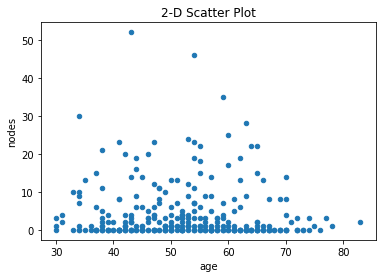

In [15]:
haberman.plot(kind='scatter',x='age',y='nodes')
plt.title('2-D Scatter Plot')
plt.show()

### Conclusion : 

#### 1. The number of nodes are independent of age.
#### 2. Higher number of patients have less than 10 nodes.(irrespective of thier age)

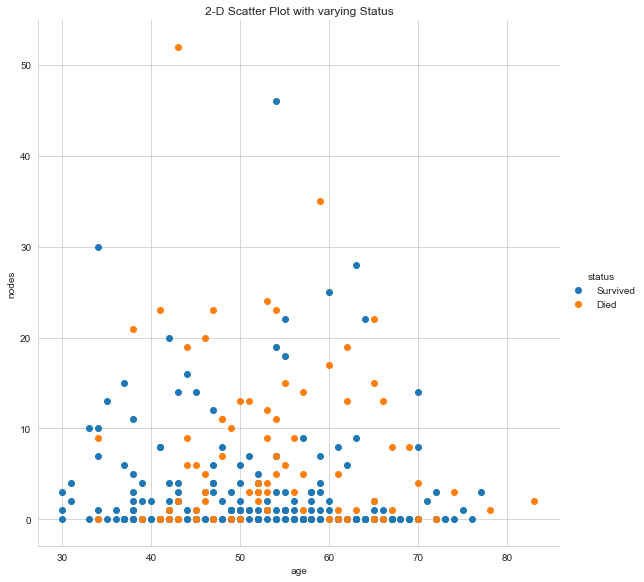

In [16]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=8) \
.map(plt.scatter, "age", "nodes") \
.add_legend();
plt.title('2-D Scatter Plot with varying Status')
plt.show();

### Conclusion :
#### 1. Patients with nodes<10 are more likely to survive.
#### 2. Patients with nodes>10 and age>50 are less likely to survive.

## Pair Plot


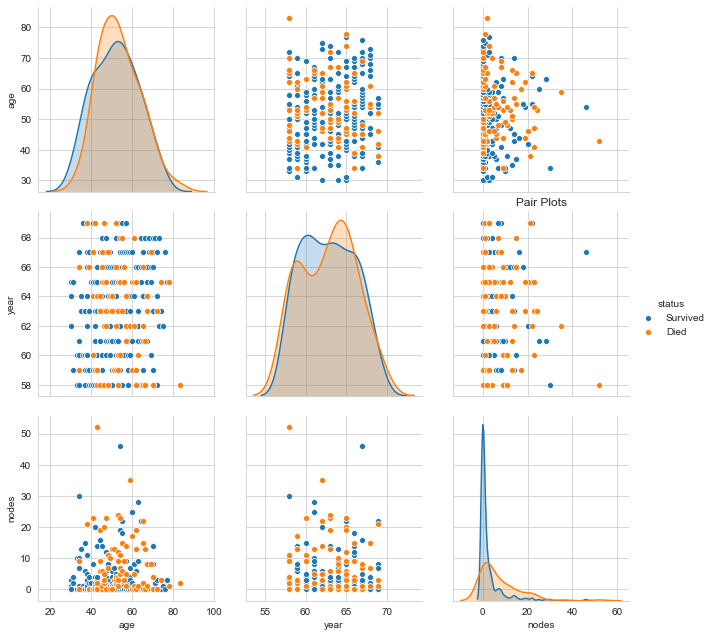

In [17]:

sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3);
plt.show()

#### Plot 3 and 7 with 'age' and 'nodes' can be used for furthur conclusion.

## 1-D Scatter Plots

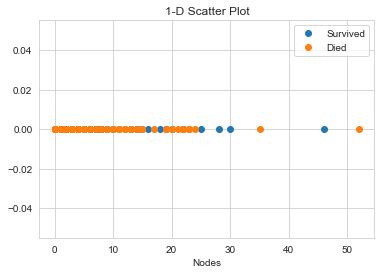

In [46]:
survived=haberman[haberman['status']=='Survived']
not_survived=haberman[haberman['status']=='Died']

plt.plot(survived["nodes"], np.zeros_like(survived['nodes']), 'o',label="Survived")
plt.plot(not_survived["nodes"], np.zeros_like(not_survived['age']), 'o',label="Died")
plt.xlabel('Nodes')
plt.legend()
plt.title('1-D Scatter Plot')
plt.show()

## Histogram , PDF , CDF

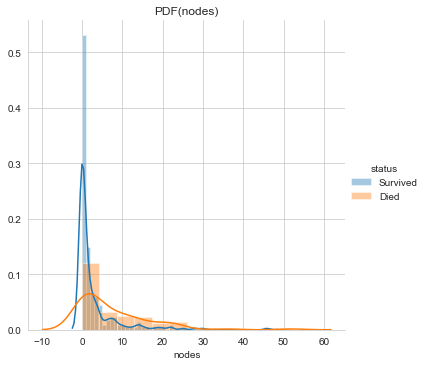

In [19]:
sns.FacetGrid(haberman, hue="status", height=5) \
.map(sns.distplot, "nodes") \
.add_legend();
plt.title('PDF(nodes)')
plt.show();

## Conclusion
### Patients with nodes<5 are likely to survive and patients with nodes>25 are not likely to survive 

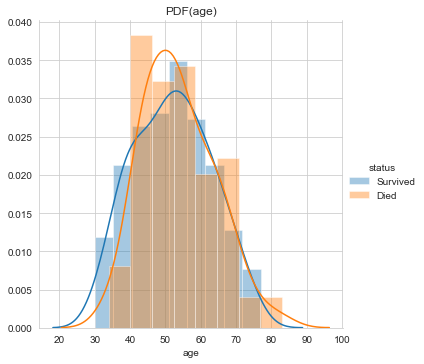

In [26]:
sns.FacetGrid(haberman, hue="status", size=5) \ # PDFs are overlapping with eeach other , no conclusion cab be drawn.
.map(sns.distplot, "age") \
.add_legend();
plt.title('PDF(age)')
plt.show();

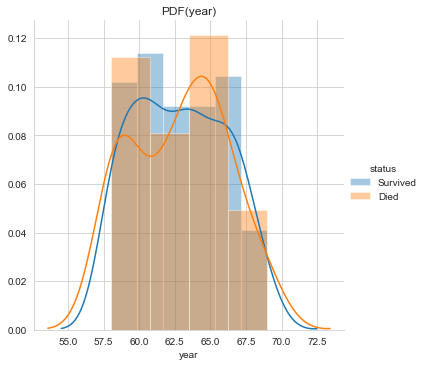

In [28]:
sns.FacetGrid(haberman, hue="status", size=5) \ # PDFs are overlapping with eeach other , no conclusion cab be drawn.
.map(sns.distplot, "year") \
.add_legend();
plt.title('PDF(year)')
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


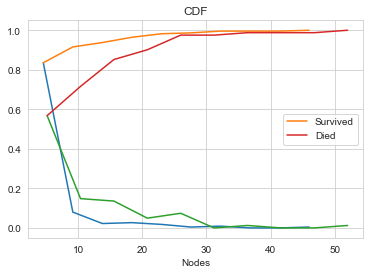

In [47]:
counts1, bin_edges1 = np.histogram(survived['nodes'], bins=10,
density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
#compute CDF
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:], cdf1,label='Survived')
plt.xlabel('Nodes')

counts2, bin_edges2 = np.histogram(not_survived['nodes'], bins=10,
density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
#compute CDF
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:], cdf2,label='Died')
plt.xlabel('Nodes')
plt.title('CDF')
plt.legend()
plt.show();

#### Red : Died ,  Orange : Survived
## Conclusion : 
#### More than 80% people who have suvived had nodes<5


## Mean, Variance and Std-dev

In [54]:
print('Mean : ')
print ('survived ' ,np.mean(survived['nodes']))
print ('not survived ',np.mean(not_survived['nodes']))
print('\nStandard Deviation:')
print('survived ' ,np.mean(survived['nodes']))
print('not survived ',np.mean(not_survived['nodes']))
# standard deviation Long survive has standard deviation of only 2.79 and 
#Short survive has 7.45, means the spread of data for short survive is more.

Mean : 
survived  2.7911111111111113
not survived  7.45679012345679

Standard Deviation:
survived  2.7911111111111113
not survived  7.45679012345679


In [55]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print('Survived ',np.median(survived["nodes"]))

print('not survived ',np.median(not_survived["nodes"]))

print("\nQuantiles:")
print('survived ',np.percentile(survived["nodes"],np.arange(0, 100, 25)))
print('not survived ',np.percentile(not_survived["nodes"],np.arange(0, 100, 25)))
print("\n90th Percentiles:")
print('survived ',np.percentile(survived["nodes"],90))
print('not survived ',np.percentile(not_survived["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived["nodes"]))
print(robust.mad(not_survived["nodes"]))



Medians:
Survived  0.0
not survived  4.0

Quantiles:
survived  [0. 0. 0. 3.]
not survived  [ 0.  1.  4. 11.]

90th Percentiles:
survived  8.0
not survived  20.0

Median Absolute Deviation
0.0
5.930408874022408


## Box Plots

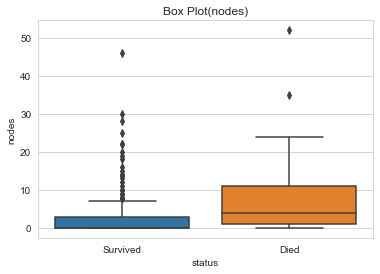

In [31]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Box Plot(nodes)')
plt.show()


### Conclusion : 
#### 1. 25th and 50th percentile are same for survived .
#### 2. Threshold for DIED Is 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2.

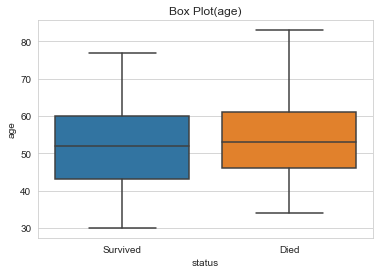

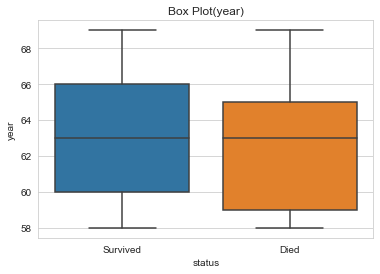

In [30]:
sns.boxplot(x='status',y='age', data=haberman)
plt.title('Box Plot(age)')
plt.show()
sns.boxplot(x='status',y='year', data=haberman)
plt.title('Box Plot(year)')
plt.show()

## Violin Plots

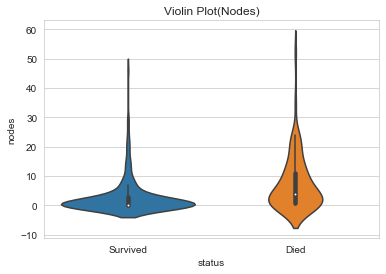

In [32]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title('Violin Plot(Nodes)')
plt.show()

### Conclusion 
#### 1.high Density for survived is around 0 and whiskers 0-7.
#### 2. Density is distribued for Died in 5-20 with whiskers 0-25.

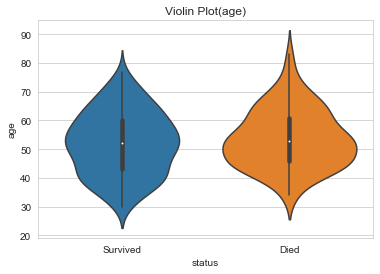

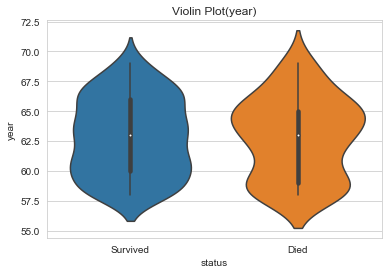

In [33]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title('Violin Plot(age)')
plt.show()
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.title('Violin Plot(year)')
plt.show()

## Contour Plot

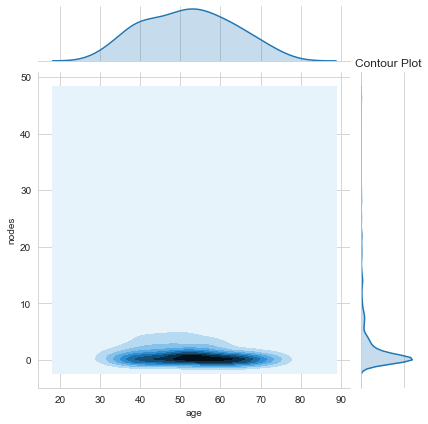

In [34]:
sns.jointplot(x='age',y='nodes',data=survived,kind='kde')
plt.grid()
plt.title('Contour Plot')
plt.show()

### Conclusion 
#### Density for survived patients is high for ages 45-65 and nodes 0-3

## Summary 
### 1. Nodes at the time of operation gives a better conclusion for the patient's survival than his/her age or the year .
### 2. More the number of nodes less are the chances of survival and less the number of nodes more are the chances of survival.]
